### 라이브러리 로드

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

### 폰트 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

### 데이터 로드

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/chuncheon_tree/main/cc_tree.csv")
df.shape

(25332, 25)

In [4]:
df.head()

,관리 ID,수종관리번호,수종명(한글명),수고,흉고직경,근원경,수관폭,수목 수령,보호틀\n설치유무,보호덮개\n설치유무,...,조성위치\n(좌/우/중앙분리대),식재 위치,식재 간격,식재상태,조성 일자,보호틀 형태,삭제 구분,삭제 사유,경도,위도
0,PT00024,벗나무-24,벗나무,4.3,14,15.4,1.5,0,Y,N,...,L,보도,6,0.0,0,직사각형,N,NaN,127.776700,37.889845
1,PT00025,벗나무-25,벗나무,3.8,12,13.2,1.5,0,Y,N,...,L,보도,6,0.0,0,직사각형,N,NaN,127.776704,37.889898
2,PT00026,벗나무-26,벗나무,4.7,17,18.7,1.5,0,Y,N,...,L,보도,6,0.0,0,직사각형,N,NaN,127.776725,37.890308
3,PT00027,벗나무-27,벗나무,4.8,13,14.3,1.5,0,Y,N,...,L,보도,6,0.0,0,직사각형,N,NaN,127.776726,37.890363
4,PT00028,벗나무-28,벗나무,4.8,15,16.5,1.5,0,Y,N,...,L,보도,6,0.0,0,직사각형,N,NaN,127.776727,37.890416


### 데이터 요약

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25332 entries, 0 to 25331
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   관리 ID             25332 non-null  object 
 1   수종관리번호            25332 non-null  object 
 2   수종명(한글명)          25332 non-null  object 
 3   수고                25332 non-null  float64
 4   흉고직경              25332 non-null  int64  
 5   근원경               25332 non-null  float64
 6   수관폭               25332 non-null  float64
 7   수목 수령             25332 non-null  int64  
 8   보호틀
설치유무          25332 non-null  object 
 9   보호덮개
설치유무         25332 non-null  object 
 10  지주대
설치유무          25332 non-null  object 
 11  보호대
설치유무          25332 non-null  object 
 12  법정동 코드            25332 non-null  int64  
 13  도로명코드             25332 non-null  int64  
 14  도로구간일련번호          25332 non-null  int64  
 15  조성위치
(좌/우/중앙분리대)  25321 non-null  object 
 16  식재 위치             25321 non-null  object

### 결측치 확인

In [6]:
df.isnull().sum()

관리 ID                    0
수종관리번호                   0
수종명(한글명)                 0
수고                       0
흉고직경                     0
근원경                      0
수관폭                      0
수목 수령                    0
보호틀\n설치유무                0
보호덮개\n설치유무               0
지주대\n설치유무                0
보호대\n설치유무                0
법정동 코드                   0
도로명코드                    0
도로구간일련번호                 0
조성위치\n(좌/우/중앙분리대)       11
식재 위치                   11
식재 간격                    0
식재상태                    18
조성 일자                    5
보호틀 형태                4840
삭제 구분                    0
삭제 사유                25324
경도                       0
위도                       0
dtype: int64

<AxesSubplot:>

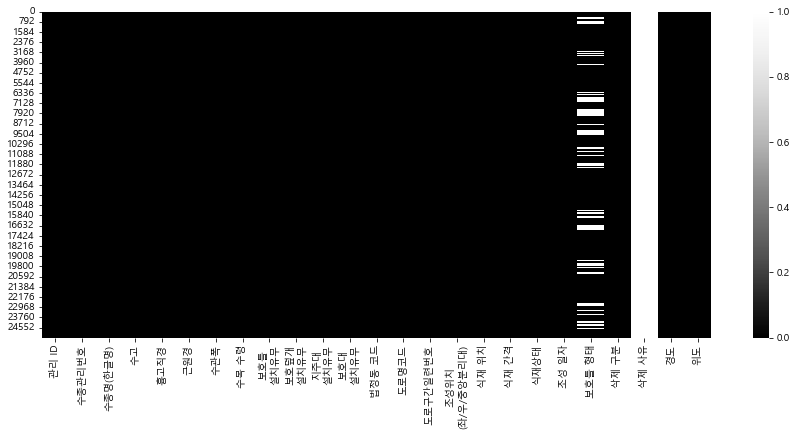

In [7]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cmap="Greys_r")

### 기술 통계
#### 수치형 데이터

In [8]:
df.describe()

,수고,흉고직경,근원경,수관폭,수목 수령,법정동 코드,도로명코드,도로구간일련번호,식재 간격,식재상태,경도,위도
count,25332.000000,25332.000000,25332.000000,25332.000000,25332.000000,2.533200e+04,2.533200e+04,25332.000000,25332.000000,25314.0,25332.000000,25332.000000
mean,6.939914,20.425036,22.466982,3.663363,16.310358,3.158424e+04,3.510079e+06,2451.022185,8.921877,0.0,127.736166,37.871194
std,2.811126,11.763823,12.940661,1.836414,40.380206,1.152853e+06,5.933899e+05,3025.350168,3.357082,0.0,0.030068,0.040602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.218001e+06,80.000000,0.000000,0.0,127.613655,37.741270
25%,5.100000,12.000000,13.200000,2.400000,0.000000,0.000000e+00,3.218010e+06,1182.000000,7.000000,0.0,127.721722,37.854998
50%,6.800000,18.000000,19.800000,3.300000,12.000000,0.000000e+00,3.218036e+06,1798.000000,8.000000,0.0,127.739353,37.871559
75%,8.500000,27.000000,29.700000,4.700000,23.000000,0.000000e+00,4.454007e+06,2556.000000,10.000000,0.0,127.754445,37.896704
max,27.600000,117.000000,128.700000,19.200000,560.000000,4.211012e+07,4.855225e+06,16462.000000,100.000000,0.0,127.830773,38.050467


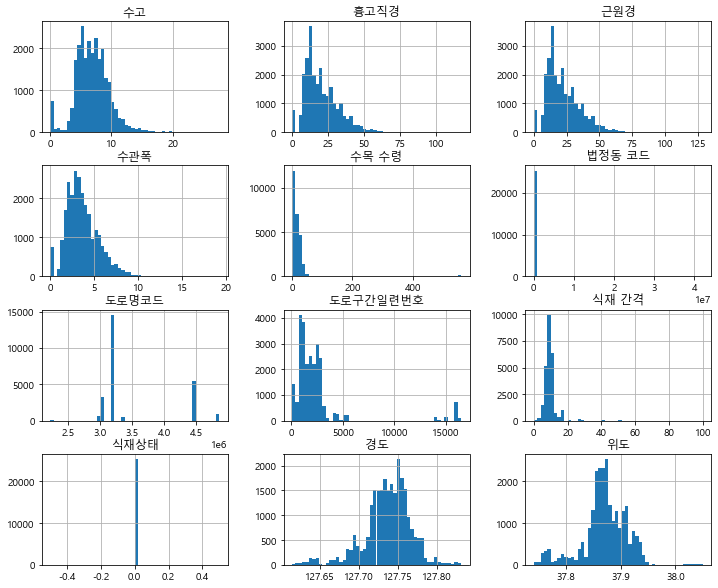

In [9]:
_ = df.hist(figsize=(12, 10), bins=50)

#### 범주형 데이터

In [10]:
df.describe(include='object')

,관리 ID,수종관리번호,수종명(한글명),보호틀\n설치유무,보호덮개\n설치유무,지주대\n설치유무,보호대\n설치유무,조성위치\n(좌/우/중앙분리대),식재 위치,조성 일자,보호틀 형태,삭제 구분,삭제 사유
count,25332,25332,25332,25332,25332,25332,25332,25321,25321,25327,20492,25332,8
unique,25332,25318,31,2,2,2,2,3,4,9,9,2,1
top,PT00024,버즘나무-21353,은행나무(수),Y,N,N,N,L,보도,0,정사각형,N,사용자에 의한 삭제
freq,1,2,6741,20492,21370,21348,25273,12508,20739,25313,8764,25324,8


In [11]:
df.nunique()

관리 ID                25332
수종관리번호               25318
수종명(한글명)                31
수고                     223
흉고직경                    92
근원경                    111
수관폭                    139
수목 수령                   46
보호틀\n설치유무                2
보호덮개\n설치유무               2
지주대\n설치유무                2
보호대\n설치유무                2
법정동 코드                   3
도로명코드                  126
도로구간일련번호               168
조성위치\n(좌/우/중앙분리대)        3
식재 위치                    4
식재 간격                   28
식재상태                     1
조성 일자                    9
보호틀 형태                   9
삭제 구분                    2
삭제 사유                    1
경도                   25332
위도                   25332
dtype: int64

### 수목 수령

In [12]:
df["수목 수령"].describe()

count    25332.000000
mean        16.310358
std         40.380206
min          0.000000
25%          0.000000
50%         12.000000
75%         23.000000
max        560.000000
Name: 수목 수령, dtype: float64

In [13]:
df[df['수목 수령'] > 500]

,관리 ID,수종관리번호,수종명(한글명),수고,흉고직경,근원경,수관폭,수목 수령,보호틀\n설치유무,보호덮개\n설치유무,...,조성위치\n(좌/우/중앙분리대),식재 위치,식재 간격,식재상태,조성 일자,보호틀 형태,삭제 구분,삭제 사유,경도,위도
10646,PT10718,산벗나무-10717,산벗나무,5.9,17,18.7,5.1,560,Y,Y,...,L,보도,10,0.0,0,정사각형,N,NaN,127.693428,37.845621
10647,PT10719,산벗나무-10718,산벗나무,7.3,17,18.7,4.9,560,Y,Y,...,L,보도,10,0.0,0,정사각형,N,NaN,127.693563,37.845572
10648,PT10720,산벗나무-10719,산벗나무,8.0,21,23.1,6.2,560,Y,Y,...,L,보도,10,0.0,0,정사각형,N,NaN,127.693667,37.845535
10649,PT10721,산벗나무-10720,산벗나무,7.4,14,15.4,6.1,560,Y,Y,...,L,보도,10,0.0,0,정사각형,N,NaN,127.693782,37.845496
10650,PT10722,산벗나무-10721,산벗나무,6.3,14,15.4,4.7,560,Y,Y,...,L,보도,10,0.0,0,정사각형,N,NaN,127.693895,37.845455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10768,PT10839,산벗나무-10838,산벗나무,4.5,13,14.3,2.1,560,Y,N,...,L,보도,10,0.0,0,정사각형,N,NaN,127.709151,37.844086
10769,PT10840,산벗나무-10839,산벗나무,6.8,19,20.9,5.2,560,Y,N,...,L,보도,10,0.0,0,정사각형,N,NaN,127.709265,37.844099
10770,PT10841,산벗나무-10840,산벗나무,5.0,20,22.0,2.0,560,Y,N,...,L,보도,10,0.0,0,정사각형,N,NaN,127.709434,37.844121
10771,PT10842,산벗나무-10841,산벗나무,5.7,12,13.2,3.8,560,Y,N,...,L,보도,10,0.0,0,정사각형,N,NaN,127.709551,37.844133


<AxesSubplot:>

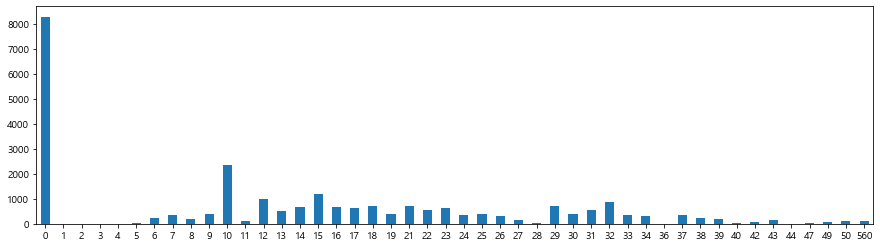

In [14]:
df['수목 수령'].value_counts().sort_index().plot.bar(figsize=(15, 4), rot=0)

<AxesSubplot:>

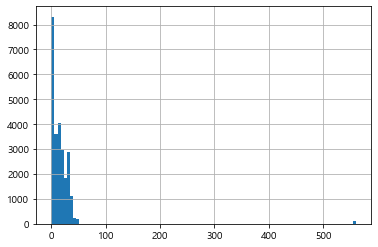

In [15]:
df['수목 수령'].hist(bins=100)

### 수종명 빈도

In [16]:
tree_count = df['수종명(한글명)'].value_counts()
tree_count.to_frame(name='count').T

,은행나무(수),이팝나무,은행나무(암),산벗나무,느티나무,왕벚나무,벗나무,버즘나무,미식재,메타세콰이아,...,백합나무,전나무,단풍나무,편백,감나무,가시나무,은행나무,스트로브잣,개나리,고사
count,6741,3379,2767,2755,1983,1493,1321,853,742,726,...,21,10,8,8,3,2,2,2,1,1


Text(0.5, 1.0, '수종명 빈도수')

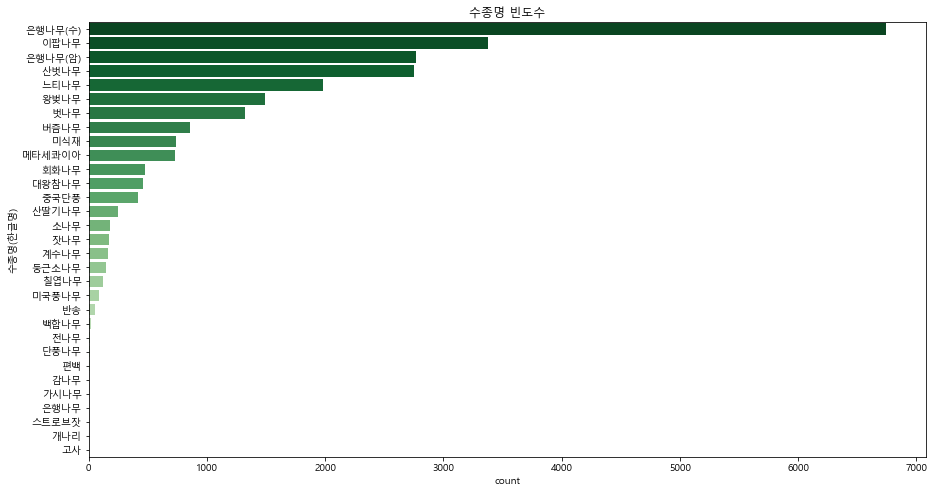

In [17]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y='수종명(한글명)', order=tree_count.index, palette='Greens_r')
plt.title('수종명 빈도수')

In [18]:
df['수종관리번호'].value_counts()

버즘나무-21353    2
산벗나무-21294    2
산벗나무-21182    2
산벗나무-21341    2
산벗나무-21419    2
             ..
은행나무-8490     1
은행나무-8489     1
은행나무-8488     1
은행나무-8487     1
이팝나무-25980    1
Name: 수종관리번호, Length: 25318, dtype: int64

In [19]:
df[df['수종관리번호'].str.contains('미식재')]

,관리 ID,수종관리번호,수종명(한글명),수고,흉고직경,근원경,수관폭,수목 수령,보호틀\n설치유무,보호덮개\n설치유무,...,조성위치\n(좌/우/중앙분리대),식재 위치,식재 간격,식재상태,조성 일자,보호틀 형태,삭제 구분,삭제 사유,경도,위도
1079,PT09389,미식재-9388,미식재,0.0,0,0.0,0.0,31,N,N,...,R,길어깨,16,0.0,0,NaN,N,NaN,127.770263,37.761607
1115,PT09390,미식재-9389,미식재,0.0,0,0.0,0.0,31,N,N,...,R,길어깨,16,0.0,0,NaN,N,NaN,127.770189,37.761618
1186,PT10689,미식재-10688,미식재,0.0,0,0.0,0.0,30,N,N,...,R,길어깨,27,0.0,0,NaN,N,NaN,127.639793,38.049514
1257,PT10690,미식재-10689,미식재,0.0,0,0.0,0.0,30,N,N,...,R,길어깨,27,0.0,0,NaN,N,NaN,127.640235,38.049801
2270,PT20306,미식재-20305,미식재,0.0,0,0.0,0.0,0,N,N,...,R,길어깨,10,0.0,0,NaN,N,NaN,127.745883,37.890087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25322,PT25971,미식재-25971,미식재,0.0,0,0.0,0.0,0,Y,N,...,L,보도,11,0.0,0,말굽형,N,NaN,127.756046,37.869975
25323,PT25972,미식재-25972,미식재,0.0,0,0.0,0.0,0,Y,N,...,L,보도,11,0.0,0,말굽형,N,NaN,127.756046,37.868461
25324,PT25973,미식재-25973,미식재,0.0,0,0.0,0.0,0,Y,N,...,L,보도,11,0.0,0,말굽형,N,NaN,127.756047,37.867800
25325,PT25974,미식재-25974,미식재,0.0,0,0.0,0.0,0,Y,N,...,L,보도,11,0.0,0,말굽형,N,NaN,127.756044,37.867633


### 경도, 위도별 수종

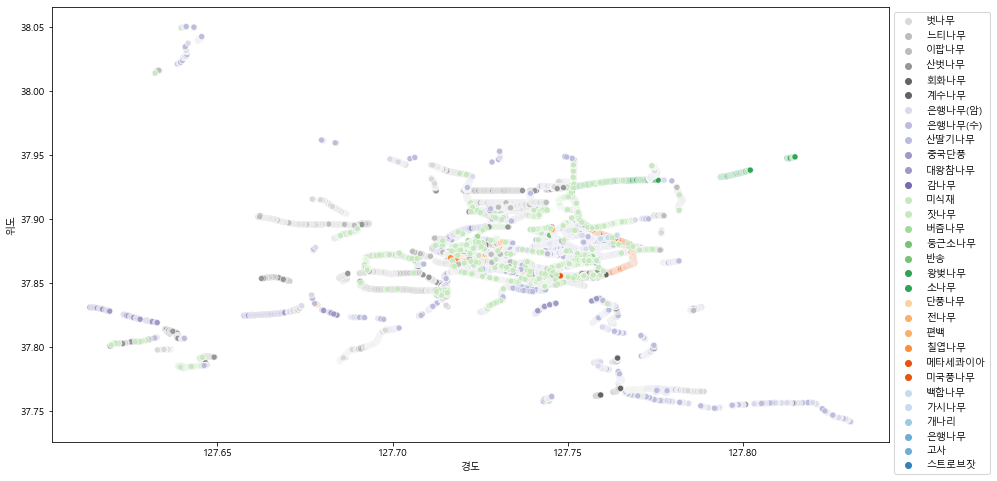

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='경도', y='위도', hue='수종명(한글명)', palette='tab20c_r')
plt.legend(bbox_to_anchor=(1, 1))

### 법정동별 수종 빈도

In [21]:
pd.crosstab(df['법정동 코드'], df['수종명(한글명)']).style.format('{:,}')

수종명(한글명),가시나무,감나무,개나리,계수나무,고사,느티나무,단풍나무,대왕참나무,둥근소나무,메타세콰이아,미국풍나무,미식재,반송,백합나무,버즘나무,벗나무,산딸기나무,산벗나무,소나무,스트로브잣,왕벚나무,은행나무,은행나무(수),은행나무(암),이팝나무,잣나무,전나무,중국단풍,칠엽나무,편백,회화나무
법정동 코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,162,0,"1,982",2,454,146,726,88,742,52,21,853,"1,321",247,"2,755",178,2,"1,493",0,"6,740","2,766","3,379",175,10,417,122,8,472
42110107,2,2,1,0,1,1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0
42110115,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
load_tree = pd.crosstab(df['도로명코드'], df['수종명(한글명)'])
load_tree.shape

(126, 31)

### 도로명코드와 수종 빈도

<AxesSubplot:xlabel='도로명코드', ylabel='수종명(한글명)'>

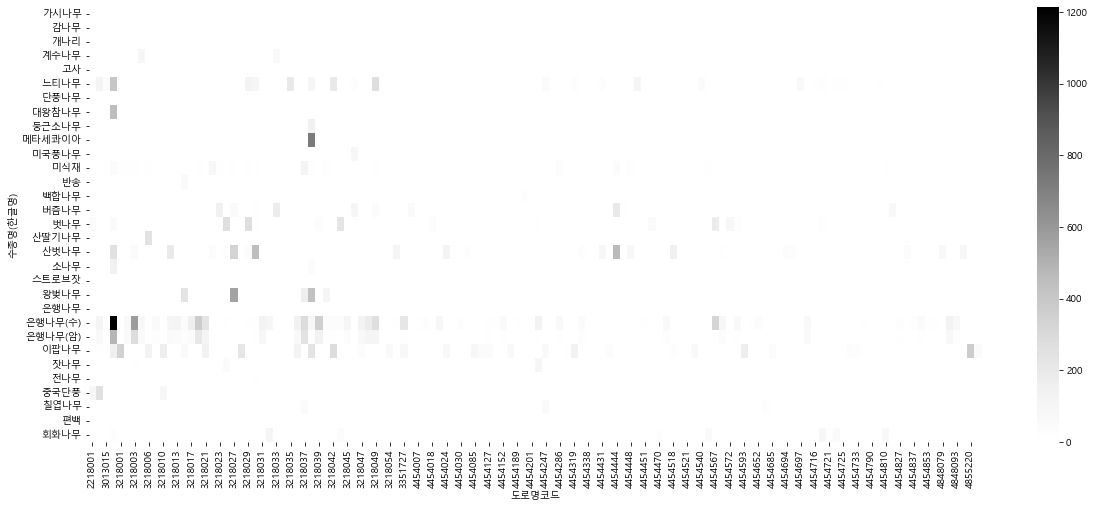

In [23]:
plt.figure(figsize=(20, 8))
sns.heatmap(load_tree.T, cmap='Greys')

In [24]:
load_tree.style.format('{:,}')

수종명(한글명),가시나무,감나무,개나리,계수나무,고사,느티나무,단풍나무,대왕참나무,둥근소나무,메타세콰이아,미국풍나무,미식재,반송,백합나무,버즘나무,벗나무,산딸기나무,산벗나무,소나무,스트로브잣,왕벚나무,은행나무,은행나무(수),은행나무(암),이팝나무,잣나무,전나무,중국단풍,칠엽나무,편백,회화나무
도로명코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2218001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0
3000120,0,0,0,0,0,113,0,4,0,0,0,1,0,0,0,2,0,0,0,0,0,0,117,66,13,0,0,253,0,0,0
3013015,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3013022,0,0,0,0,0,404,1,450,0,0,0,39,0,0,0,54,0,247,142,0,0,0,"1,214",481,159,7,0,0,0,0,20
3218001,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,345,0,0,0,0,0,0
3218002,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,69,52,0,0,0,0,0,0,0
3218003,0,0,0,0,0,7,0,0,0,0,0,11,0,0,2,0,0,47,0,0,0,0,587,278,0,16,0,0,0,0,1
3218004,0,0,0,96,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,70,49,0,0,0,0,0,0,0
3218006,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,8,243,0,0,0,0,0,0,0,126,0,0,0,0,0,0


### 조성일자

In [25]:
df['조성 일자'].value_counts()

0                      25313
2020-08-05 00:00:00        5
2020-07-20 00:00:00        2
2020-08-10 00:00:00        2
2020-08-07 00:00:00        1
2020-07-17 00:00:00        1
2020-08-01 00:00:00        1
2020-08-06 00:00:00        1
2020-08-04 00:00:00        1
Name: 조성 일자, dtype: int64

### 수고

In [26]:
tree_high_mean = df.groupby('수종명(한글명)')['수고'].mean().sort_values(ascending=False)
tree_high_mean

수종명(한글명)
소나무        12.148315
버즘나무       10.956038
잣나무        10.402857
은행나무(암)     8.874124
편백          8.862500
은행나무(수)     8.499807
중국단풍        8.069784
회화나무        8.057839
전나무         8.030000
느티나무        7.102925
계수나무        7.011728
메타세콰이아      6.648485
스트로브잣       6.550000
칠엽나무        5.845902
산벗나무        5.711289
백합나무        5.680952
벗나무         5.484103
이팝나무        5.231844
왕벚나무        5.168118
대왕참나무       5.067033
미국풍나무       4.604545
산딸기나무       4.030364
은행나무        2.500000
단풍나무        2.475000
가시나무        2.000000
감나무         1.666667
반송          1.615385
둥근소나무       1.432192
고사          1.000000
개나리         1.000000
미식재         0.000000
Name: 수고, dtype: float64

Text(0.5, 1.0, '평균 수고')

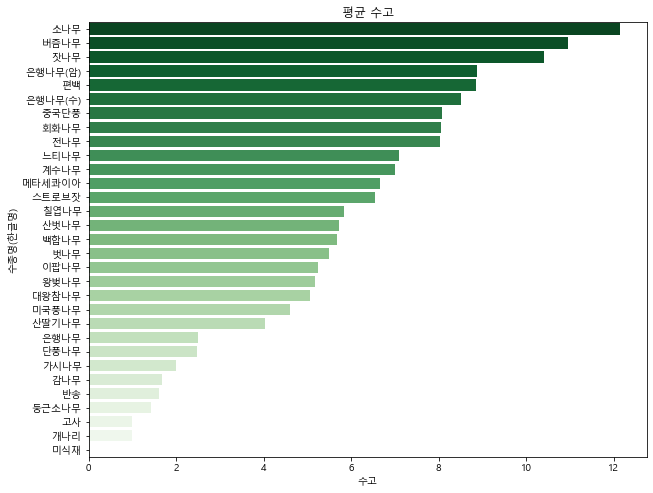

In [27]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, y='수종명(한글명)', x='수고', ci=None, order=tree_high_mean.index, palette='Greens_r')
plt.title('평균 수고')

### 수고, 수관폭, 흉고직경

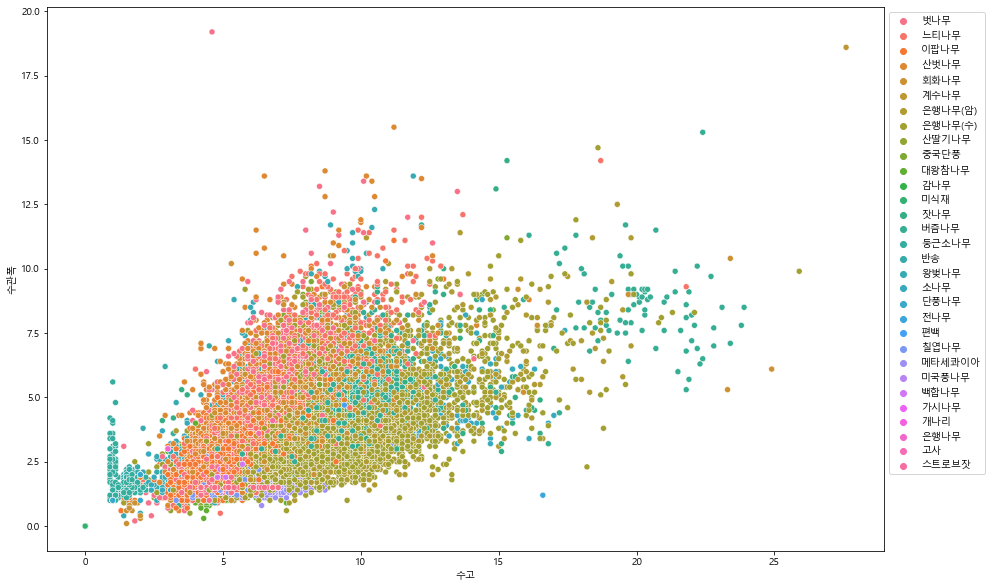

In [28]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='수고', y='수관폭', hue='수종명(한글명)')
plt.legend(bbox_to_anchor=(1,1))

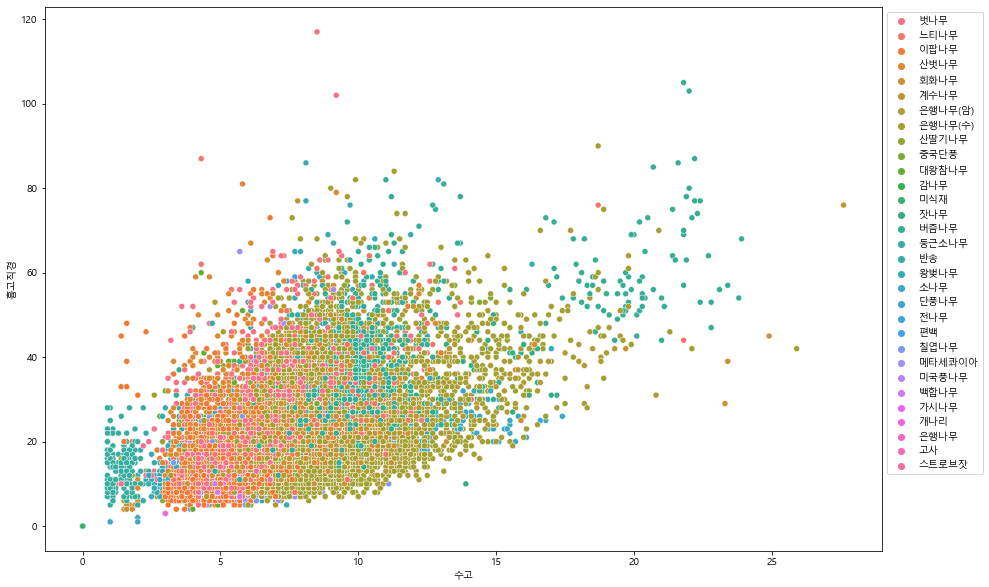

In [29]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='수고', y='흉고직경', hue='수종명(한글명)')
plt.legend(bbox_to_anchor=(1,1))

### 조성위치

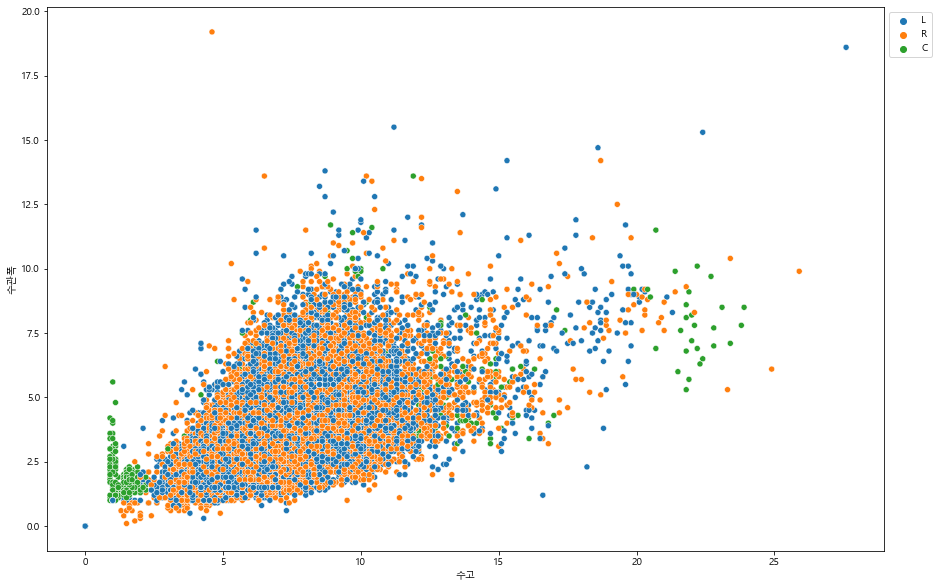

In [30]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='수고', y='수관폭', hue='조성위치\n(좌/우/중앙분리대)')
plt.legend(bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='count', ylabel='수종명(한글명)'>

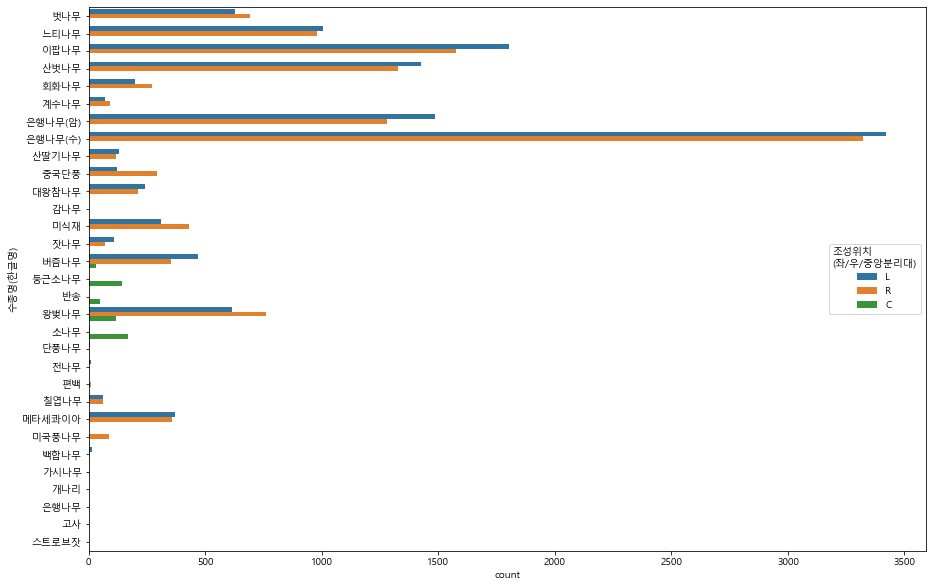

In [31]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y="수종명(한글명)", hue="조성위치\n(좌/우/중앙분리대)")

In [32]:
df.columns

Index(['관리 ID', '수종관리번호', '수종명(한글명)', '수고', '흉고직경', '근원경', '수관폭', '수목 수령',
       '보호틀\n설치유무', '보호덮개\n설치유무', '지주대\n설치유무', '보호대\n설치유무', '법정동 코드', '도로명코드',
       '도로구간일련번호', '조성위치\n(좌/우/중앙분리대)', '식재 위치', '식재 간격', '식재상태', '조성 일자',
       '보호틀 형태', '삭제 구분', '삭제 사유', '경도', '위도'],
      dtype='object')

### 지도 시각화

In [33]:
lat_long = df[['위도', '경도']].mean()
lat_long.values

array([ 37.87119365, 127.73616625])

In [34]:
import matplotlib.colors as mcolors

colors = mcolors.CSS4_COLORS 
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                 name)
                for name, color in colors.items())
names = [name for hsv, name in by_hsv]
len(names)

148

In [35]:
tree_name_count = df['수종명(한글명)'].nunique()
tree_name_count

31

In [36]:
start_no = 20
color_names = names[start_no::3]
color_names_list = color_names[:tree_name_count]

In [37]:
folium_color_dict = dict(zip(df['수종명(한글명)'].unique().tolist(), color_names_list))
folium_color_dict

{'벗나무': 'darkred',
 '느티나무': 'salmon',
 '이팝나무': 'coral',
 '산벗나무': 'sienna',
 '회화나무': 'saddlebrown',
 '계수나무': 'peru',
 '은행나무(암)': 'darkorange',
 '은행나무(수)': 'tan',
 '산딸기나무': 'papayawhip',
 '중국단풍': 'wheat',
 '대왕참나무': 'darkgoldenrod',
 '감나무': 'gold',
 '미식재': 'palegoldenrod',
 '잣나무': 'beige',
 '버즘나무': 'olive',
 '둥근소나무': 'yellowgreen',
 '반송': 'chartreuse',
 '왕벚나무': 'darkseagreen',
 '소나무': 'forestgreen',
 '단풍나무': 'green',
 '전나무': 'mediumseagreen',
 '편백': 'mediumspringgreen',
 '칠엽나무': 'turquoise',
 '메타세콰이아': 'azure',
 '미국풍나무': 'darkslategray',
 '백합나무': 'darkcyan',
 '가시나무': 'darkturquoise',
 '개나리': 'lightblue',
 '은행나무': 'lightskyblue',
 '고사': 'dodgerblue',
 '스트로브잣': 'slategray'}

### folium을 통한 나무 위치 시각화

In [38]:
str(df.loc[0].to_dict()).replace(
    "'수목 수령'", "<br/>'수목 수령'").replace(
    "'법정동 코드'", "<br/>'법정동 코드'").replace(
    "'조성 일자'", "<br/>'조성 일자'")

"{'관리 ID': 'PT00024', '수종관리번호': '벗나무-24', '수종명(한글명)': '벗나무', '수고': 4.3, '흉고직경': 14, '근원경': 15.4, '수관폭': 1.5, <br/>'수목 수령': 0, '보호틀\\n설치유무': 'Y', '보호덮개\\n설치유무': 'N', '지주대\\n설치유무': 'N', '보호대\\n설치유무': 'N', <br/>'법정동 코드': 0, '도로명코드': 2218001, '도로구간일련번호': 163, '조성위치\\n(좌/우/중앙분리대)': 'L', '식재 위치': '보도', '식재 간격': 6, '식재상태': 0.0, <br/>'조성 일자': '0', '보호틀 형태': '직사각형', '삭제 구분': 'N', '삭제 사유': nan, '경도': 127.776699518688, '위도': 37.8898448573093}"

#### 수목 수령이 큰 나무만 보기

In [ ]:
# tree_name = "계수나무"
# tiles="Stamen Toner"
tree_map = folium.Map(location=lat_long.values, zoom_start=12)
# df_tree = df[df['수종명(한글명)'] == tree_name]
df_tree = df[df['수목 수령'] > 100]

for sub_tree in df_tree.iterrows():
    tree = sub_tree[1]
    folium.CircleMarker(location=[tree["위도"], tree["경도"]], 
                        radius=1, color=folium_color_dict[tree['수종명(한글명)']],
                        tooltip=str(tree.to_dict()).replace(
                            "'수목 수령'", "<br/>'수목 수령'").replace(
                            "'법정동 코드'", "<br/>'법정동 코드'").replace(
                            "'조성 일자'", "<br/>'조성 일자'")
                       ).add_to(tree_map)
tree_map.save('tree_age.html')
tree_map

#### 전체 나무

In [ ]:
# tiles="Stamen Toner"
tree_map = folium.Map(location=lat_long.values, zoom_start=12)

for sub_tree in df.iterrows():
    tree = sub_tree[1]
    folium.CircleMarker(location=[tree["위도"], tree["경도"]], 
                        radius=1, color=folium_color_dict[tree['수종명(한글명)']],
                        tooltip=str(tree.to_dict()).replace(
                            "'수목 수령'", "<br/>'수목 수령'").replace(
                            "'법정동 코드'", "<br/>'법정동 코드'").replace(
                            "'조성 일자'", "<br/>'조성 일자'")
                       ).add_to(tree_map)
tree_map.save('tree_all.html')
tree_map

#### 지도의 타일 변경하기

In [ ]:
# tiles="Stamen Toner"
tree_map = folium.Map(location=lat_long.values, zoom_start=12, tiles="Stamen Toner")

for sub_tree in df.iterrows():
    tree = sub_tree[1]
    folium.CircleMarker(location=[tree["위도"], tree["경도"]], 
                        radius=1, color=folium_color_dict[tree['수종명(한글명)']],
                        tooltip=str(tree.to_dict()).replace(
                            "'수목 수령'", "<br/>'수목 수령'").replace(
                            "'법정동 코드'", "<br/>'법정동 코드'").replace(
                            "'조성 일자'", "<br/>'조성 일자'")
                       ).add_to(tree_map)
tree_map.save('stamen_tree_all.html')
tree_map